In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy.interpolate import interp1d
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import pandas as pd
import h5py


In [2]:
f = h5py.File('/Users/jon.heffer/COTA/lip_ambient_breath.hdf5', 'r')
list(f.keys())

['Channel 1', 'Channel 2', 'Channel 5', 'Channel 8']

In [3]:
T_amb = np.array(f['Channel 1'])
T_lip = np.array(f['Channel 2'])
V_sync = np.array(f['Channel 5'])/1000
T_breath = np.array(f['Channel 8'])
length=T_amb.size
print(length)
Time=np.linspace(0,(length-1)*0.1,length)
Time[0:3]

28320


array([0. , 0.1, 0.2])

<IPython.core.display.Javascript object>


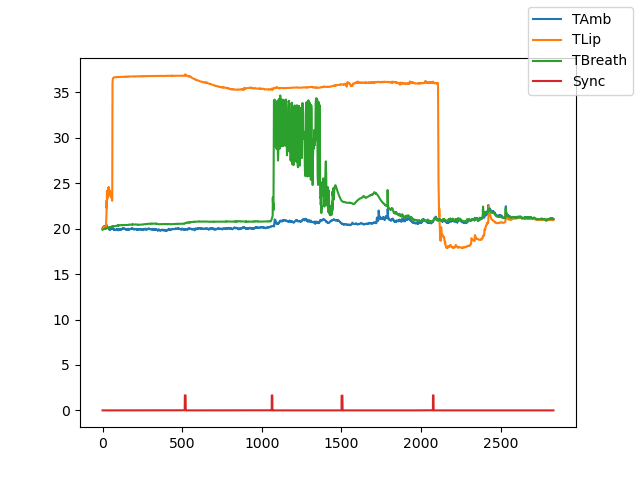

In [4]:
%matplotlib notebook
fig, ax = plt.subplots()
l1=ax.plot(Time,T_amb,label='TAmb')
l2=ax.plot(Time,T_lip,label='TLip')
l3=ax.plot(Time,T_breath,label='TBreath')
l4=ax.plot(Time,V_sync,label='Sync')
fig.legend()
#handles=[l1,l2,l3, l4])
fig.show()

<IPython.core.display.Javascript object>


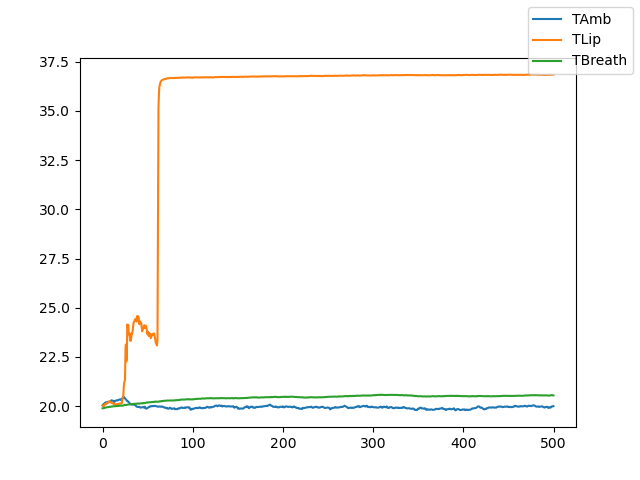

In [5]:
fig1, ax1 = plt.subplots()
l1=ax1.plot(Time[0:5000],T_amb[0:5000],label='TAmb')
l2=ax1.plot(Time[0:5000],T_lip[0:5000],label='TLip')
l3=ax1.plot(Time[0:5000],T_breath[0:5000],label='TBreath')
#l4=ax1.plot(V_sync[0:5000],label='Sync')
fig1.legend()
#handles=[l1,l2,l3, l4])
fig1.show()

<IPython.core.display.Javascript object>


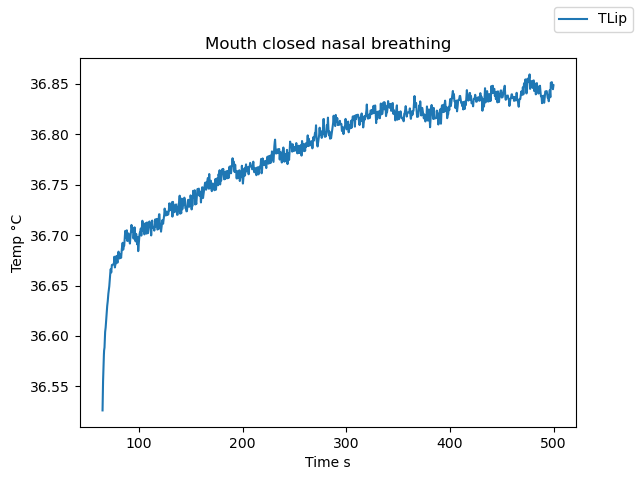

In [6]:
fig1, ax1 = plt.subplots()
#l1=ax1.plot(T_amb[0:5000],label='TAmb')
start=650
end=5000
l2=ax1.plot(Time[start:end],T_lip[start:end],label='TLip')
ax1.set_ylabel('Temp \u00B0C')
ax1.set_xlabel('Time s')
ax1.set_title('Mouth closed nasal breathing')

#l3=ax1.plot(T_breath[0:5000],label='TBreath')
#l4=ax1.plot(V_sync[0:5000],label='Sync')
fig1.legend()
#handles=[l1,l2,l3, l4])
fig1.show()

<IPython.core.display.Javascript object>


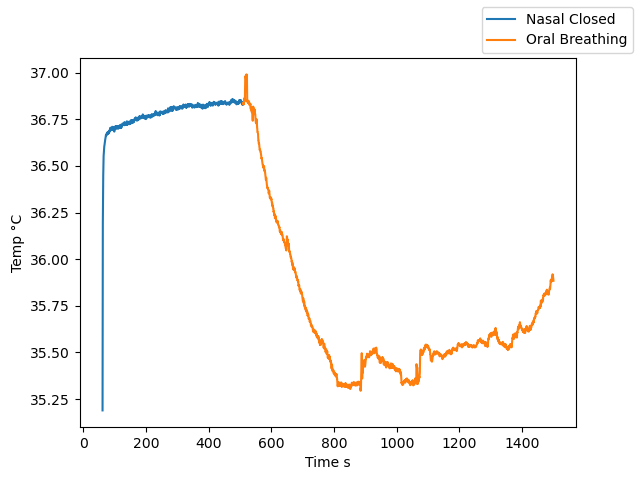

In [7]:
fig1, ax1 = plt.subplots()
#l1=ax1.plot(T_amb[0:5000],label='TAmb')
start=620
end=5100

l2=ax1.plot(Time[start:end],T_lip[start:end],label='Nasal Closed')
start=5100
end=15000

l3=ax1.plot(Time[start:end],T_lip[start:end],label='Oral Breathing')
#l2=ax1.plot(Time[start:end],T_breath[start:end],label='TBreath')
ax1.set_ylabel('Temp \u00B0C')
ax1.set_xlabel('Time s')
#ax1.set_title('Mouth closed nasal breathing - then oral breathing @550s')

#l3=ax1.plot(T_breath[0:5000],label='TBreath')
#l4=ax1.plot(V_sync[0:5000],label='Sync')
fig1.legend()
#handles=[l1,l2,l3, l4])
fig1.show()

<IPython.core.display.Javascript object>


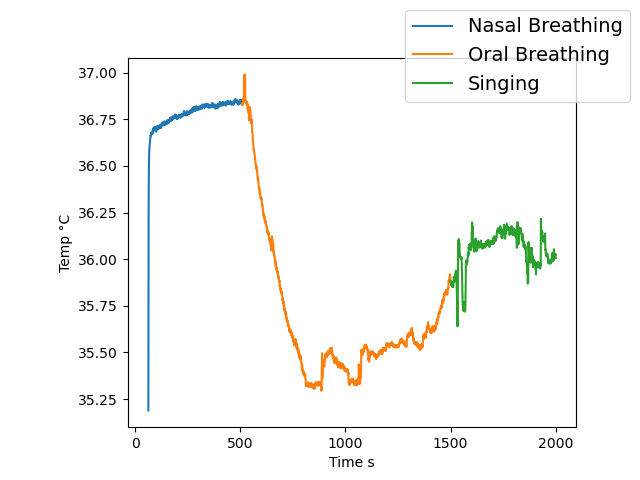

In [8]:
fig1, ax1 = plt.subplots()
font = {'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
#l1=ax1.plot(T_amb[0:5000],label='TAmb')
start=620
end=5100

l2=ax1.plot(Time[start:end],T_lip[start:end],label='Nasal Breathing')
start=end
end=15000

l3=ax1.plot(Time[start:end],T_lip[start:end],label='Oral Breathing')

start=end
end=20000

l4=ax1.plot(Time[start:end],T_lip[start:end],label='Singing')

#l2=ax1.plot(Time[start:end],T_breath[start:end],label='TBreath')
ax1.set_ylabel('Temp \u00B0C')
ax1.set_xlabel('Time s')
#ax1.set_title('Mouth closed nasal breathing - then oral breathing @550s')

#l3=ax1.plot(T_breath[0:5000],label='TBreath')
#l4=ax1.plot(V_sync[0:5000],label='Sync')
fig1.legend()
pos = ax1.get_position()
pos.x0 = 0.2       # for example 0.2, choose your value
ax1.set_position(pos)

#handles=[l1,l2,l3, l4])
fig1.show()
fig1.savefig('3starges.png')
